<a href="https://colab.research.google.com/github/Yaroslavwvw/universiti/blob/main/5_1_%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0_Pandas_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №5. Библиотека Pandas. Визуальный анализ данных

## Комплексное задание №1. Применение основных методов для анализа данных

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/drive/1SLqmaYz4xEsxVV-LGwb3ityheBTzHJQu?usp=sharing)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с Вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
%matplotlib inline
import pandas as pd
pd.__version__

'2.2.2'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [ ]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [ ]:
df.tail(10)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [ ]:
df.shape

(32561, 15)

3) Какие типы данных у элементов этого датасета?

In [ ]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education.num,int64
marital.status,object
occupation,object
relationship,object
race,object
sex,object


4) Какие признаки имеют пропуски?

In [ ]:
miss = df.columns[df.isnull().any()]
miss

Index(['workclass', 'occupation', 'native.country'], dtype='object')

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

In [ ]:
#люди не дали своии данные

Ваш ответ:

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [ ]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

7) Какой средний возраст женщин и мужчин?

In [ ]:
df['age'].mean()

38.58164675532078

8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: xlabel='education'>

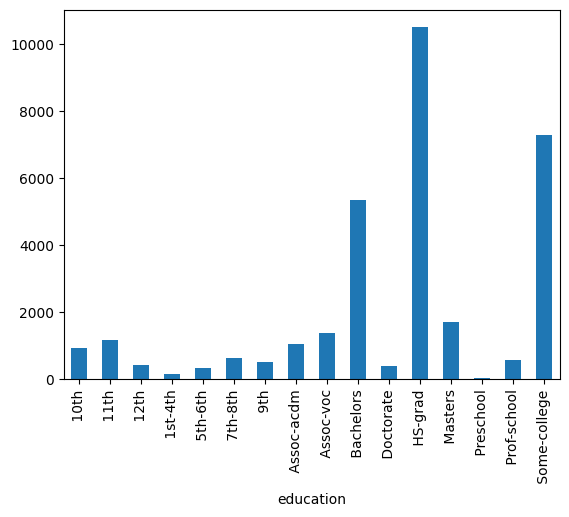

In [ ]:
df.groupby('education')['education'].count().plot(kind='bar')

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак income) и тех, кто получает менее 50K в год?

In [ ]:
more50 = df['age'][df['income'] == ' >50K']
less50 = df['age'][df['income'] == ' <=50K']
print(f"{more50.mean()}, {more50.std()}")
print(f"{less50.mean()}, {less50.std()}")

44.24984058155847, 10.51902771985177
36.78373786407767, 14.020088490824813


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [ ]:
import numpy as np

high_level = np.array(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'])
educ = df['education'][df['income'] == ' >50K']
educ.isin(high_level).all()

False

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [ ]:
wage = df[df['income'] == ' >50K']
Married = np.array ([' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse'])
wage_income = wage.groupby('marital.status').count()['income']
m=0
nm=0
for i in wage_income.index:
  if i in Married:
    m += wage_income[i]
  else:
    nm += wage_income[i]
print(wage_income)
if m>nm:
  print("женатых больше")

marital.status
Divorced                  463
Married-AF-spouse          10
Married-civ-spouse       6692
Married-spouse-absent      34
Never-married             491
Separated                  66
Widowed                    85
Name: income, dtype: int64
женатых больше


12) Постройте [сводную таблицу](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) для отображения зависимостей среднего времени работы (hours.per.week) с доходом (income) для каждой страны (native.country).  


> Пример фрагмента таблицы:



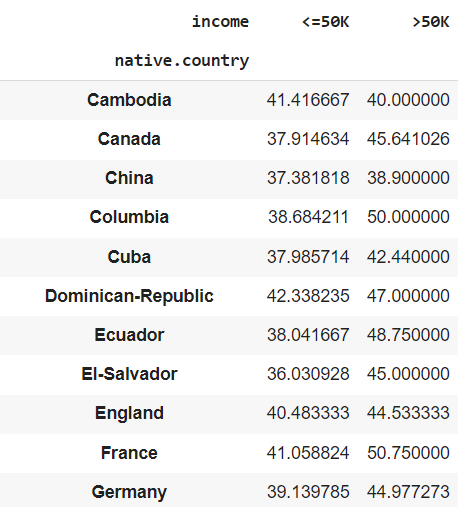

In [ ]:
table = df.pivot_table(values="hours.per.week", index="native.country", columns="income")

print(table)

income                          <=50K       >50K
native.country                                  
Cambodia                    41.416667  40.000000
Canada                      37.914634  45.641026
China                       37.381818  38.900000
Columbia                    38.684211  50.000000
Cuba                        37.985714  42.440000
Dominican-Republic          42.338235  47.000000
Ecuador                     38.041667  48.750000
El-Salvador                 36.030928  45.000000
England                     40.483333  44.533333
France                      41.058824  50.750000
Germany                     39.139785  44.977273
Greece                      41.809524  50.625000
Guatemala                   39.360656  36.666667
Haiti                       36.325000  42.750000
Holand-Netherlands          40.000000        NaN
Honduras                    34.333333  60.000000
Hong                        39.142857  45.000000
Hungary                     31.300000  50.000000
India               

13) Постройте сводную таблицу для сравнения уровня образования и разности между capital.gain и capital.loss по следующему алгоритму:&nbsp;  
1. Создайте вспомогательную таблицу (датафрейм) и добавьте в неё столбец "education" из целевой таблицы
2. Добавьте во вспомогательную таблицу ещё один столбец "capital.diff", значиниями которого будут являться разности столбцов capital.gain и capital.loss целевой таблицы
3. Удалите во вспомогательной таблице все строки, в которых значение столбца "capital.diff" равно нулю  
&nbsp; Подсказка:
```
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
```
4. Для набора значений из столбца "capital.diff", необходимо сформировать 10 категорий (кластеров), это можно сделать с помощью математических функций, типа log, извлечение корня N-ой степени и округления, для последующего перехода к категориальным признакам.  
  * В нашем случае, можно воспользоваться методом [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) и равномерно разделить наш набор данных на целевое количество категорий
5. Добавьте во вспомогательную таблицу столбец "categories", и проинициализируйте его значениями категорий, которые возвращает метод pd.qcut()  
&nbsp; Пример:
```
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)

6. Постройте сводную таблицу с помощью метода pivot_table(),

Примерная структура таблицы (в качестве значений выводится количество людей, относящихся к той или иной группе):

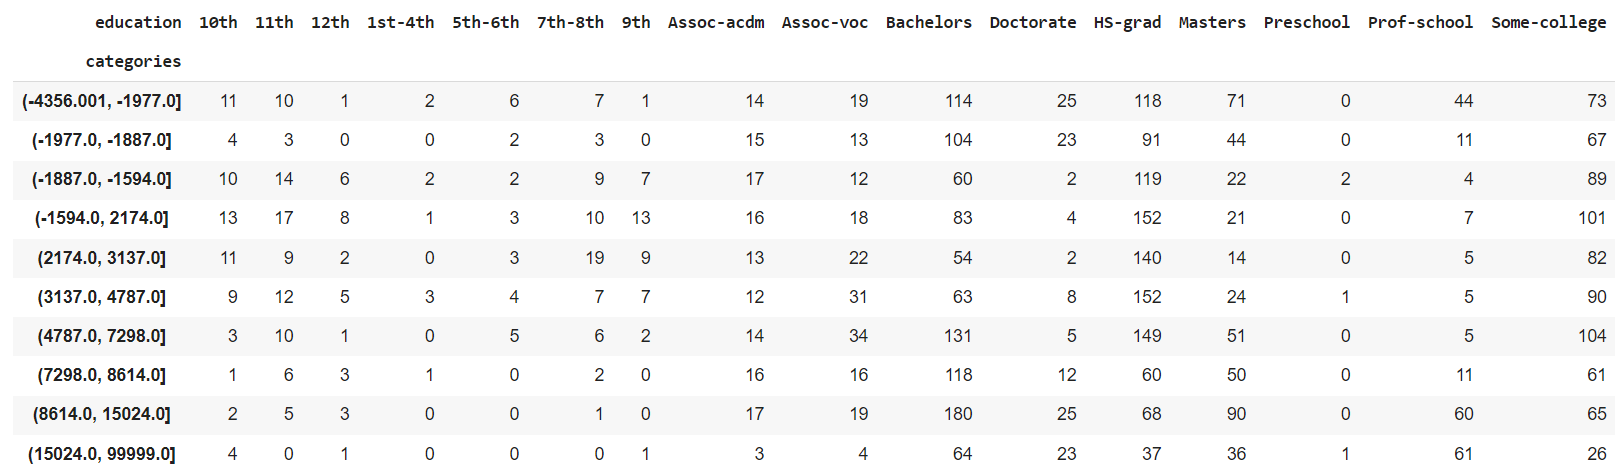

In [ ]:
summary_table = pd.DataFrame(df['education'])
summary_table['capital.diff'] = df['capital.gain'] - df['capital.loss']
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)
summary_table.pivot_table(values="capital.diff", index="categories", columns="education",aggfunc="count")

<ipython-input-7-ce5f4264d517>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  summary_table.pivot_table(values="capital.diff", index="categories", columns="education",aggfunc="count")


education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
categories,,,,,,,,,,,,,,,,
"(-4356.001, -1977.0]",11,10,1,2,6,7,1,14,19,114,25,118,71,0,44,73
"(-1977.0, -1887.0]",4,3,0,0,2,3,0,15,13,104,23,91,44,0,11,67
"(-1887.0, -1594.0]",10,14,6,2,2,9,7,17,12,60,2,119,22,2,4,89
"(-1594.0, 2174.0]",13,17,8,1,3,10,13,16,18,83,4,152,21,0,7,101
"(2174.0, 3137.0]",11,9,2,0,3,19,9,13,22,54,2,140,14,0,5,82
"(3137.0, 4787.0]",9,12,5,3,4,7,7,12,31,63,8,152,24,1,5,90
"(4787.0, 7298.0]",3,10,1,0,5,6,2,14,34,131,5,149,51,0,5,104
"(7298.0, 8614.0]",1,6,3,1,0,2,0,16,16,118,12,60,50,0,11,61
"(8614.0, 15024.0]",2,5,3,0,0,1,0,17,19,180,25,68,90,0,60,65


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [ ]:
sum = df[(df['income'] == ' >50K') & (df['sex'] == ' Female')].groupby('native.country').size()
sum.idxmax()

' United-States'

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [ ]:
import numpy as np

df['magic_salary'] = np.where(df['income'] == ' <=50K', np.random.randint(0, 51, size=len(df)), np.random.randint(51, 201, size=len(df)))
a = df.groupby('education')['magic_salary'].mean()
a

,magic_salary
education,
10th,31.267953
11th,30.840851
12th,32.124711
1st-4th,27.077381
5th-6th,29.570571
7th-8th,30.783282
9th,29.301556
Assoc-acdm,49.111528
Assoc-voc,50.016643


## Комплексное задание №2. Визуальный анализ данных. Часть 1

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании Вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите самостоятельно(!), с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [3]:
df = pd.read_csv('sample_data/bikes_rent.csv')

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

In [8]:
print(df.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


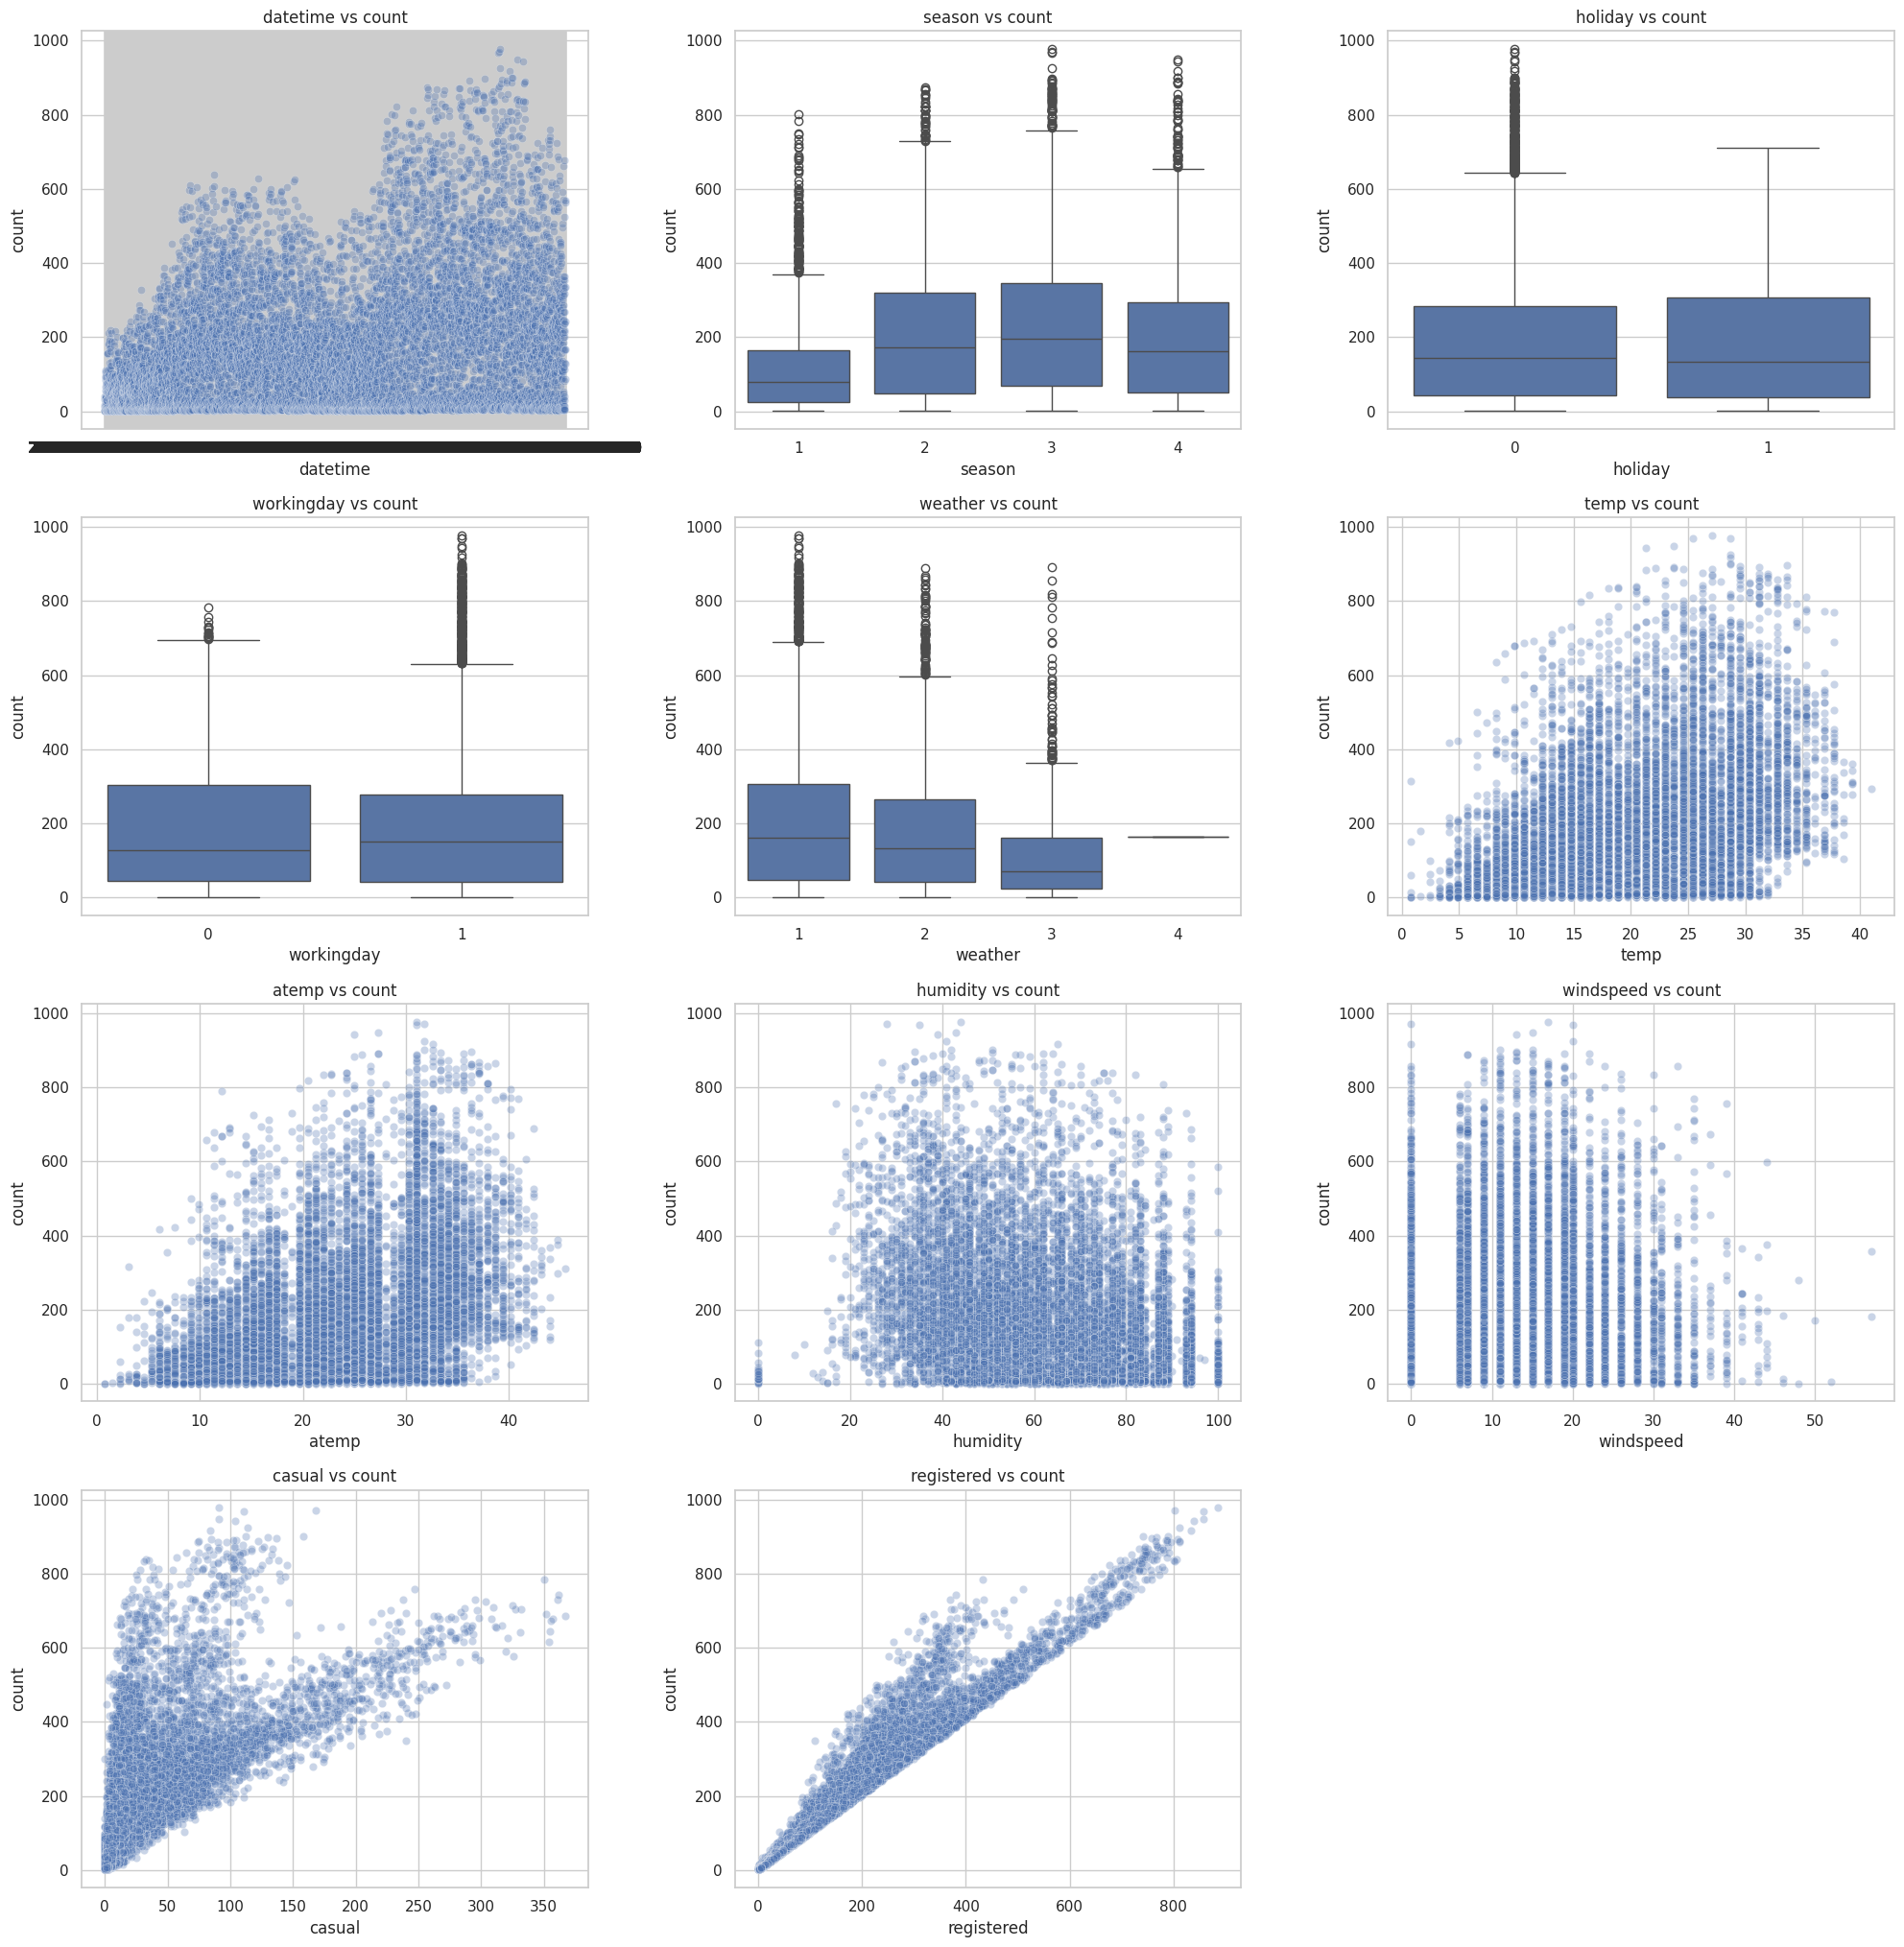

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Загрузка данных (если ещё не загружены)
# df = pd.read_csv('bikes_rent.csv.gz', compression='gzip')

# Настройка стиля
sns.set(style="whitegrid")
plt.figure(figsize=(20, 25))

# Колонки, кроме целевой
features = df.columns[:-1]

# Построение графиков
for i, col in enumerate(features):
    plt.subplot(5, 3, i + 1)  # настроим 5 строк по 3 графика максимум
    if df[col].nunique() < 10:
        # Для категориальных признаков — boxplot
        sns.boxplot(x=col, y='count', data=df)
    else:
        # Для числовых — scatterplot
        sns.scatterplot(x=col, y='count', data=df, alpha=0.3)
    plt.title(f'{col} vs count')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label sta

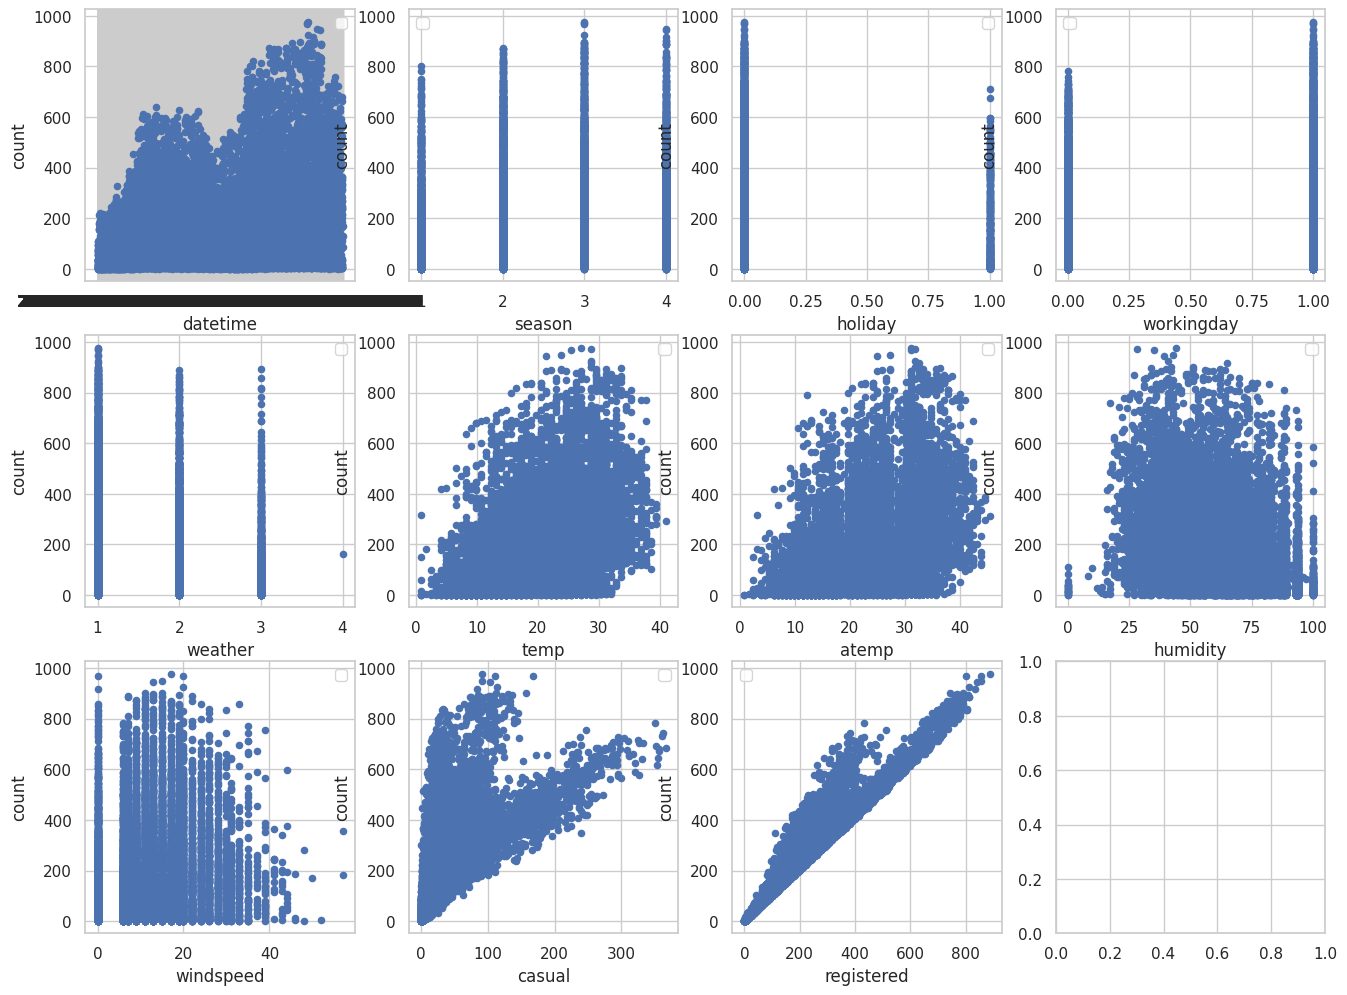

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "count", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

### 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?





'


ответ: в теплое время года прокатов больше, чем в холодное

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.





```
# Выбран кодовый формат
```

Ответ:temp, atemp

### 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.



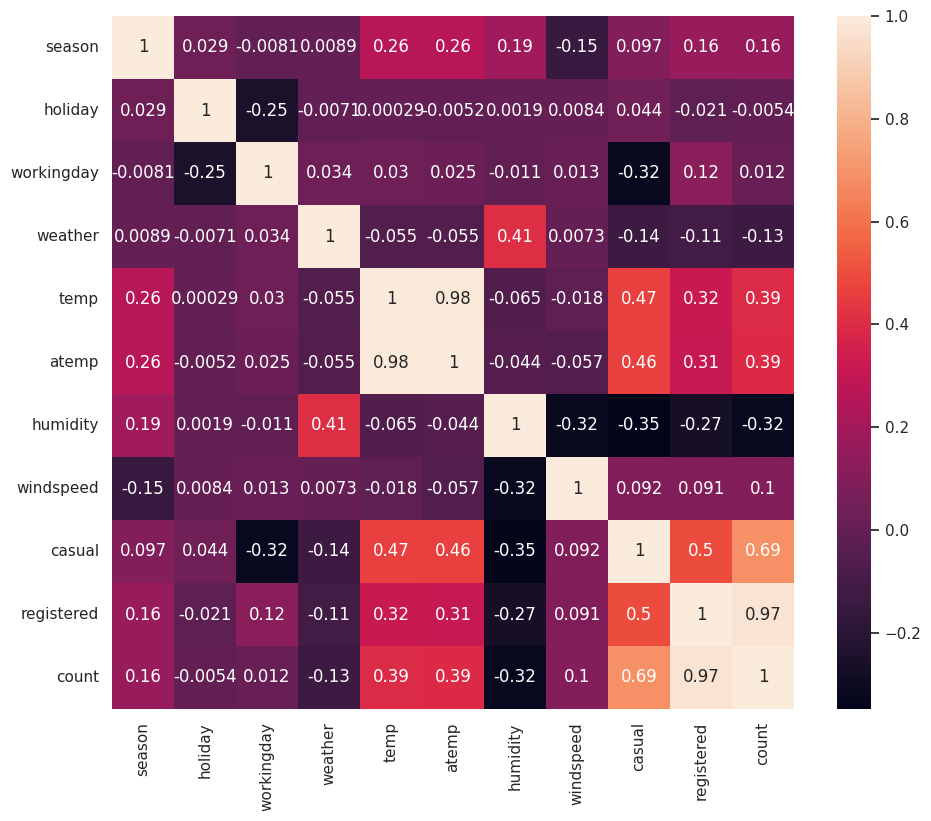

In [15]:
# Удаляем строковые
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize = (11,9))
ax = sns.heatmap(df_numeric.corr(), annot=True,)

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

меньше всего: holiday weekday workingday hum
больше всего:temp atemp yr season


### 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)



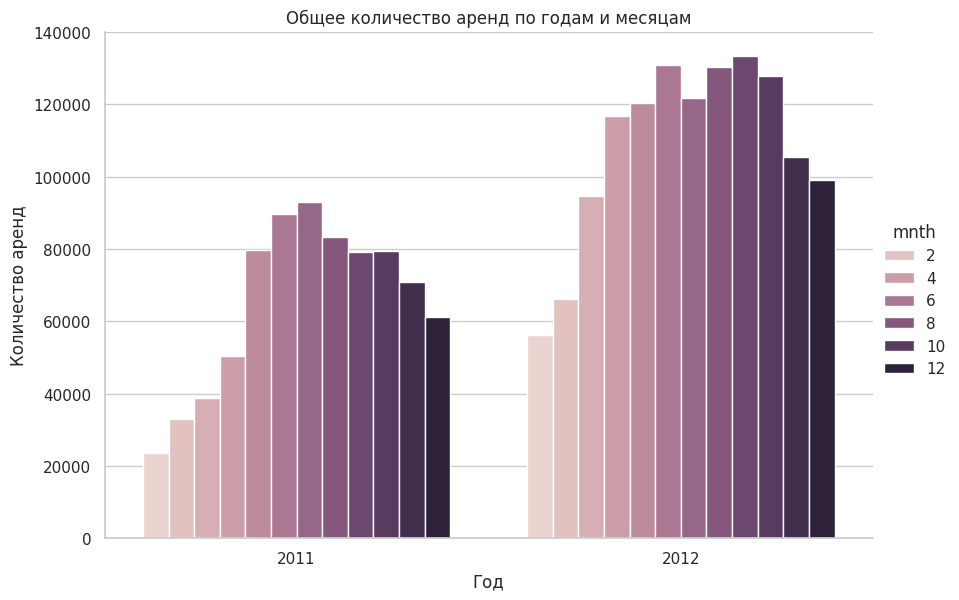

In [20]:
df['datetime'] = pd.to_datetime(df['datetime'])

#год и месяц
df['yr'] = df['datetime'].dt.year
df['mnth'] = df['datetime'].dt.month
df_g = df.groupby(['yr', 'mnth']).sum(numeric_only=True).reset_index()
sns.set(style="whitegrid")
sns.catplot(
    x='yr',
    y='count',
    hue='mnth',
    data=df_g,
    kind='bar',
    height=6,
    aspect=1.5
)

plt.title('Общее количество аренд по годам и месяцам')
plt.xlabel('Год')
plt.ylabel('Количество аренд')
plt.show()

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: потому что больше всего пользуются велосипедами в теплое время года

### 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,



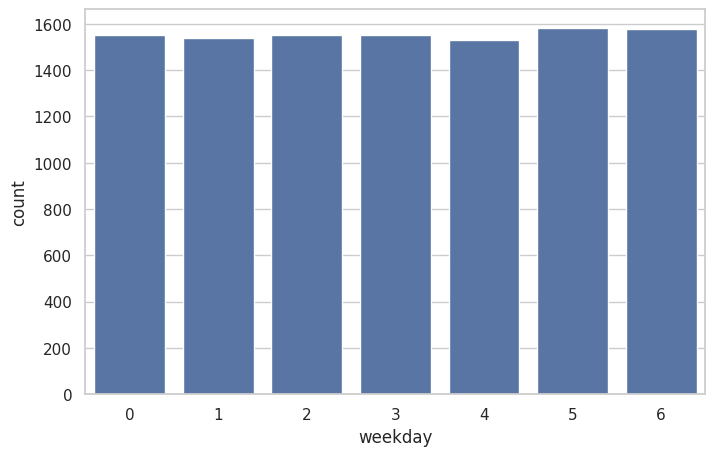

In [22]:
df['weekday'] = df['datetime'].dt.weekday
plt.figure(figsize=(8, 5))
sns.countplot(x='weekday', data=df)
plt.show()


<Axes: xlabel='weather', ylabel='count'>

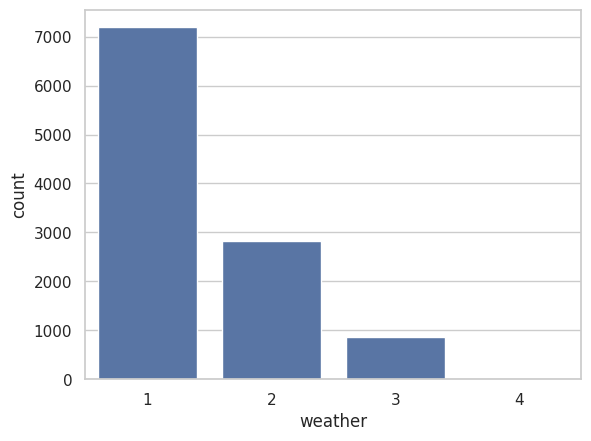

In [26]:

sns.countplot(x=df['weather'])


**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.



Ответ: количество поездок каждый день

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?


    
Ответ:равномерное

### 5. Распределение

Постройте распределение целевого признака.


<ipython-input-27-fa514ae313c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['count'].dropna())


<Axes: xlabel='count', ylabel='Density'>

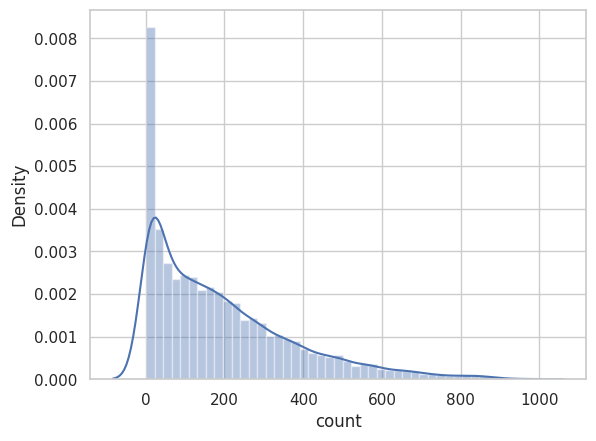

In [27]:
sns.distplot(df['count'].dropna())


**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

Ответ:25


### 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.



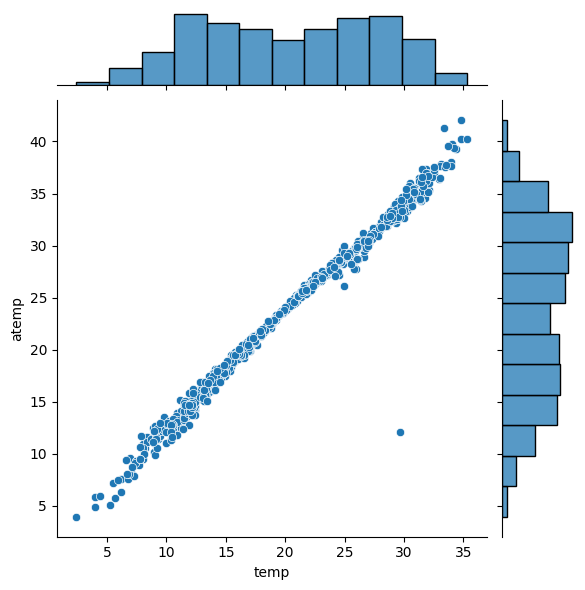

In [ ]:
sns.jointplot(x=df['temp'], y=df['atemp'])

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?





Ответ:выброс при температуре в 30 а ощущения 12

### 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.




<Axes: xlabel='mnth', ylabel='cnt'>

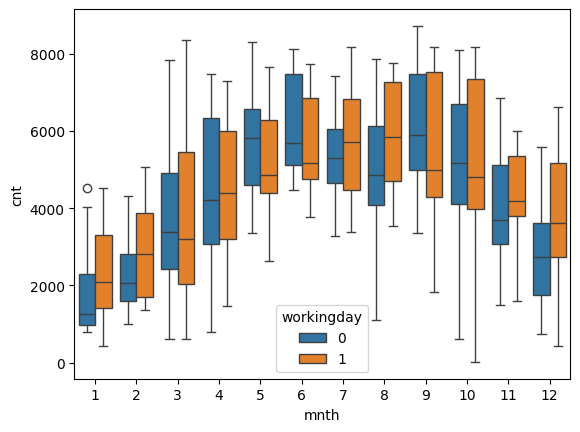

In [ ]:
sns.boxplot(x='mnth', y='cnt', hue='workingday', data=df)

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.

*Ответ*:в рабочие дни люди могут добираться на работу, в теплые дни часто берут велосипеды чтобы просто покататься

## Комплексное задание №3. Визуальный анализ данных. Часть 2

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
colab = False # если работаете на своём компьютере, в локальной среде, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

В этом задании Вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

Исходные данные загрузите самостоятельно!

In [30]:
if colab:
    df = pd.read_csv('sample_data/StudentsPerformance.csv')
else:
    df = pd.read_csv('sample_data/StudentsPerformance.csv')

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Ход задания:

#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


<ipython-input-32-5854869e342a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'].dropna())
<ipython-input-32-5854869e342a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reading score'].dropna())
<ipython-input-32-5854869e342a>:3: UserWarning: 

`distplot` is a deprecated 

Медиана оценок по математике: 66.0
Медиана оценок по чтению: 70.0
Медиана оценок по письму: 69.0


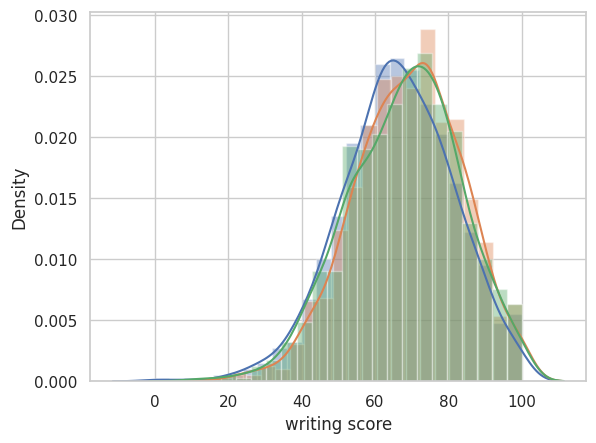

In [32]:
sns.distplot(df['math score'].dropna())
sns.distplot(df['reading score'].dropna())
sns.distplot(df['writing score'].dropna())

median_math = df['math score'].median()
median_reading = df['reading score'].median()
median_writing = df['writing score'].median()

print(f"Медиана оценок по математике: {median_math}")
print(f"Медиана оценок по чтению: {median_reading}")
print(f"Медиана оценок по письму: {median_writing}")

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


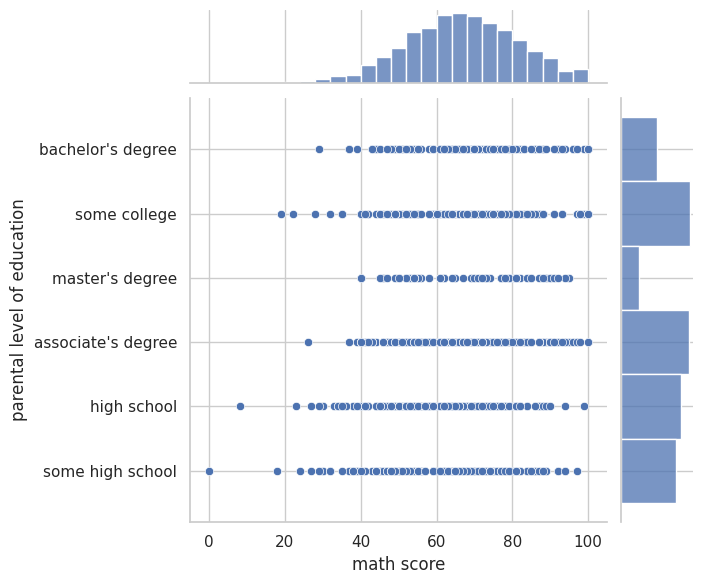

In [33]:
df['parental level of education'].unique()
df['parental level of education'].value_counts()
sns.jointplot(x=df['math score'], y=df['parental level of education'])

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [34]:
df[(df['math score'] > 90) & (df['writing score'] > 90) & (df['reading score'] > 90) & (df['gender']=='female')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99
685,female,group E,master's degree,standard,completed,94,99,100
712,female,group D,some college,standard,none,98,100,99


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [35]:
print(f"Баллы студенток по математике\n{df[df['gender']=='female']['math score'].agg(['min','max','median'])}\n")
print(f"Баллы студенток по чтению\n{df[df['gender']=='female']['reading score'].agg(['min','max','median'])}\n")
print(f"Баллы студенток по письму\n{df[df['gender']=='female']['writing score'].agg(['min','max','median'])}\n")

print(f"Баллы студентов по математике\n{df[df['gender']=='male']['math score'].agg(['min','max','median'])}\n")
print(f"Баллы студентов по чтению\n{df[df['gender']=='male']['reading score'].agg(['min','max','median'])}\n")
print(f"Баллы студентов по письму\n{df[df['gender']=='male']['writing score'].agg(['min','max','median'])}\n")

Баллы студенток по математике
min         0.0
max       100.0
median     65.0
Name: math score, dtype: float64

Баллы студенток по чтению
min        17.0
max       100.0
median     73.0
Name: reading score, dtype: float64

Баллы студенток по письму
min        10.0
max       100.0
median     74.0
Name: writing score, dtype: float64

Баллы студентов по математике
min        27.0
max       100.0
median     69.0
Name: math score, dtype: float64

Баллы студентов по чтению
min        23.0
max       100.0
median     66.0
Name: reading score, dtype: float64

Баллы студентов по письму
min        15.0
max       100.0
median     64.0
Name: writing score, dtype: float64



#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете  [pd.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html))

In [36]:
display(df[df['gender'] == 'female'].groupby("lunch").mean(numeric_only=True))
display(df[df['gender'] == 'male'].groupby("lunch").mean(numeric_only=True))

,math score,reading score,writing score
lunch,,,
free/reduced,55.814815,67.386243,66.444444
standard,68.124620,75.607903,75.927052


,math score,reading score,writing score
lunch,,,
free/reduced,62.457831,61.542169,59.126506
standard,72.022152,67.537975,65.509494


#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

race/ethnicity               group A  group B  group C  group D  group E
parental level of education                                             
associate's degree                14       41       78       50       39
bachelor's degree                 12       20       40       28       18
high school                       18       48       64       44       22
master's degree                    3        6       19       23        8
some college                      18       37       69       67       35
some high school                  24       38       49       50       18


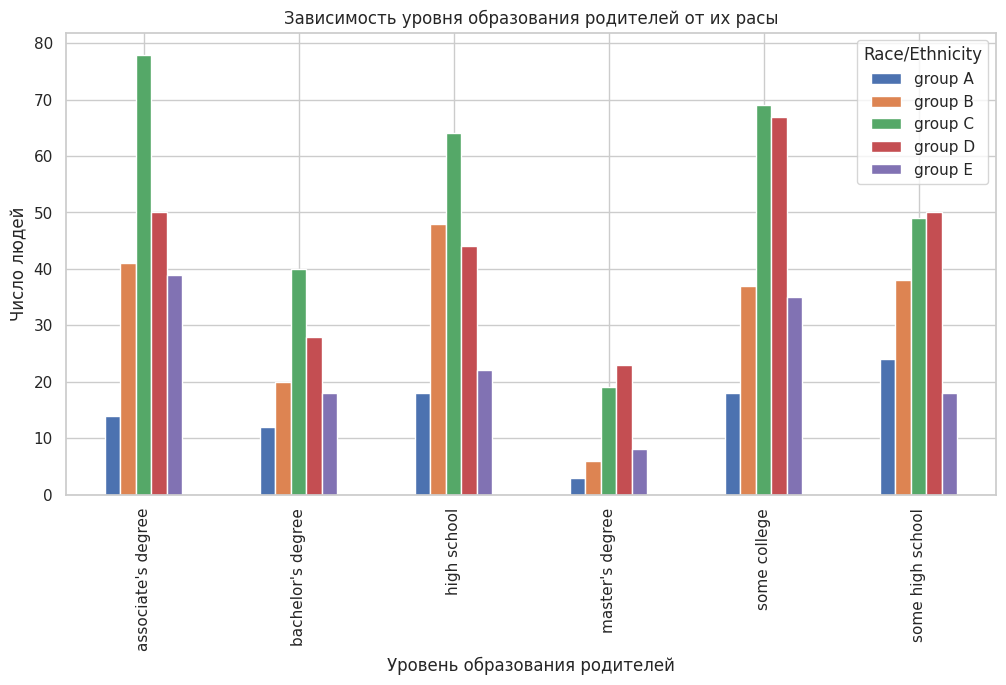

In [37]:
education_race_group = df.groupby(['parental level of education', 'race/ethnicity']).size().unstack()
print(education_race_group)
education_race_group.plot(kind='bar', figsize=(12, 6))
plt.title('Зависимость уровня образования родителей от их расы')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Число людей')
plt.legend(title='Race/Ethnicity', loc='upper right')
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

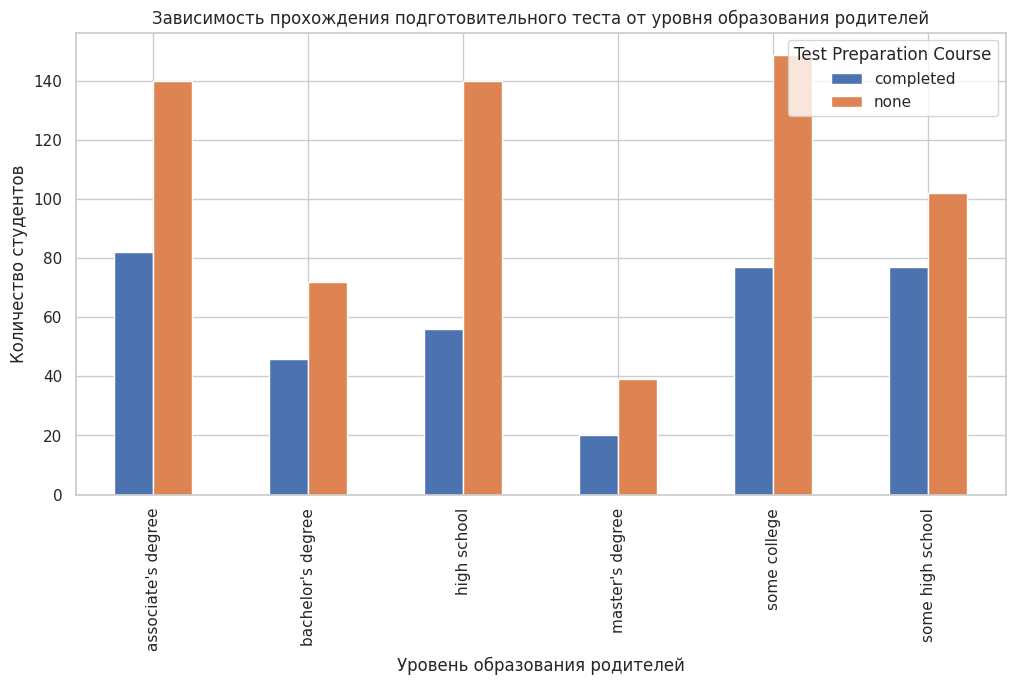

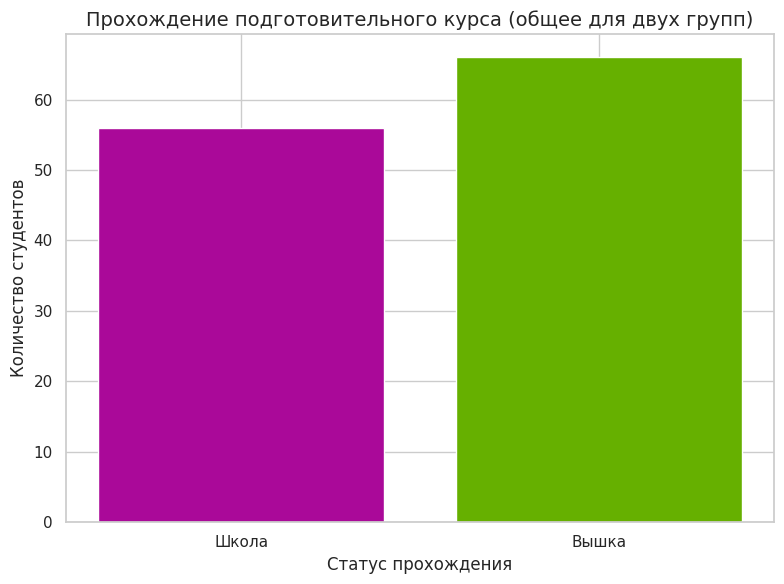

In [38]:
prep_by_education = df.groupby(['parental level of education', 'test preparation course']).size().unstack()

prep_by_education.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество студентов')
plt.legend(title='Test Preparation Course', loc='upper right')
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

low_edu = df[df['parental level of education'].isin(['high school'])]
high_edu = df[df['parental level of education'].isin(["bachelor's degree", "master's degree"])]

low_edu_counts = low_edu['test preparation course'].value_counts()
high_edu_counts = high_edu['test preparation course'].value_counts()

total_low = int(low_edu_counts.get('completed', 0))
total_high = int(high_edu_counts.get('completed', 0))

data_to_plot = pd.DataFrame({
    'Статус прохождения': ['Школа', 'Вышка'],
    'Количество студентов': [total_low, total_high]
})

plt.figure(figsize=(8, 6))
plt.bar(data_to_plot['Статус прохождения'], data_to_plot['Количество студентов'], color=['#AA0999', '#66B000'])

plt.title('Прохождение подготовительного курса (общее для двух групп)', fontsize=14)
plt.xlabel('Статус прохождения', fontsize=12)
plt.ylabel('Количество студентов', fontsize=12)
plt.tight_layout()

plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

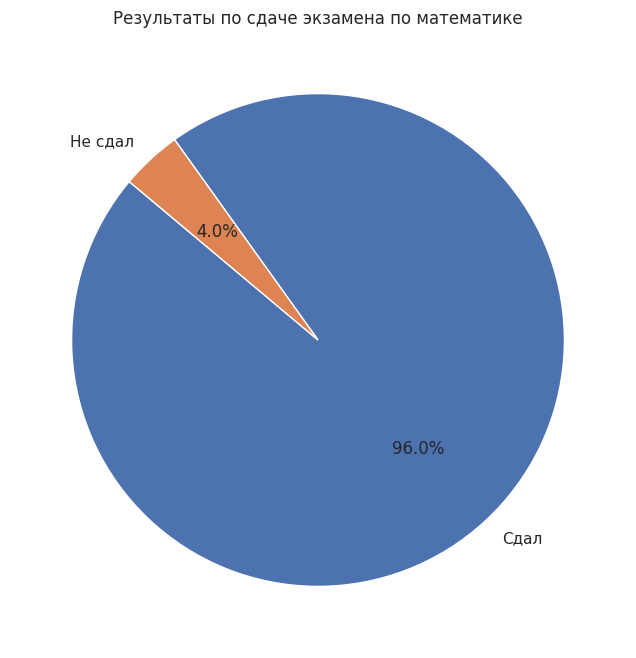

In [39]:
df['exam_result'] = df['math score'].apply(lambda x: 'Сдал' if x >= 40 else 'Не сдал')

exam_results = df['exam_result'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(exam_results, labels=exam_results.index, autopct='%1.1f%%', startangle=140)
plt.title('Результаты по сдаче экзамена по математике')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

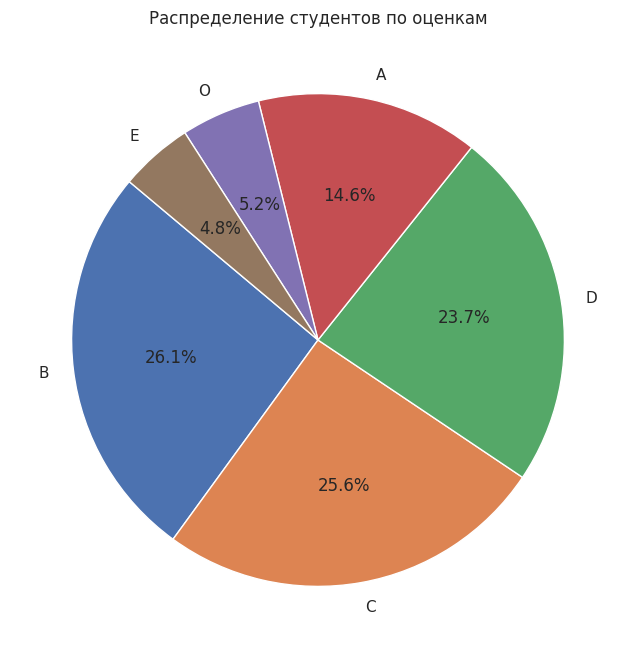

In [40]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

def assign_grade(row):
    average_score = row['average_score']
    if row['math score'] < 40:
        return 'E'
    elif average_score >= 90:
        return 'O'
    elif average_score >= 80:
        return 'A'
    elif average_score >= 70:
        return 'B'
    elif average_score >= 60:
        return 'C'
    elif average_score >= 41:
        return 'D'
    else:
        return 'E'

df['grade'] = df.apply(assign_grade, axis=1)

grade_counts = df['grade'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение студентов по оценкам')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

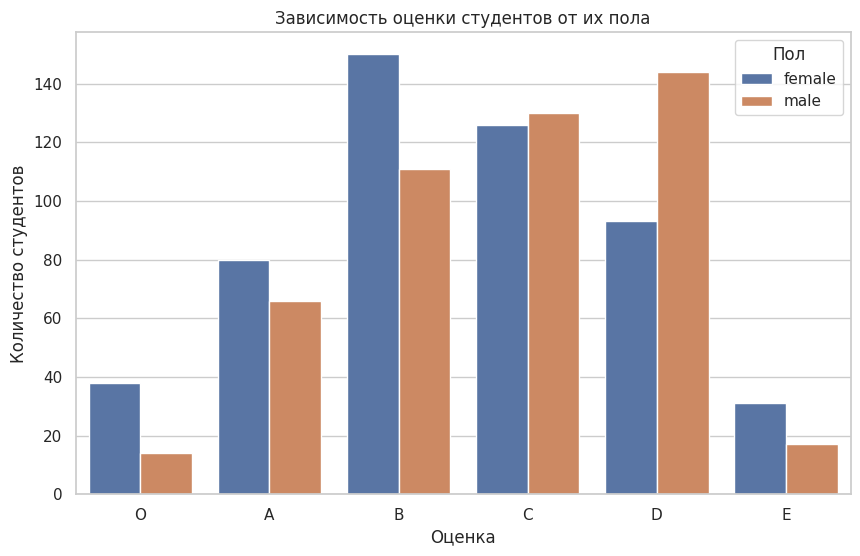

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='gender', data=df, order=['O', 'A', 'B', 'C', 'D', 'E'])
plt.title('Зависимость оценки студентов от их пола')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.legend(title='Пол', loc='upper right')
plt.show()